In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


In [47]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models'

In [48]:
df=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\Sample.csv')
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301


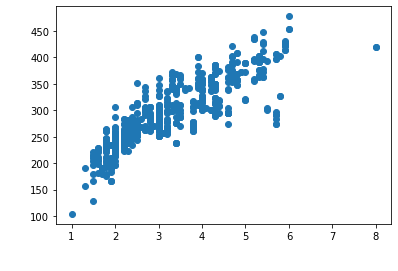

In [49]:
plt.scatter(cdf.ENGINE_SIZE,cdf.CO2_EMISSIONS)
plt.xlabel("Engine Size",color='white',size=20)
plt.ylabel("CO2 Emissions",color='white',size=20)
plt.show()

In [50]:
msk=np.random.rand(len(df))<0.3
train=df[msk]
test=df[~msk]

The Coefficient are  [[ 0.         71.97019817 -3.84118294]]
The intercept is  [103.55407524]


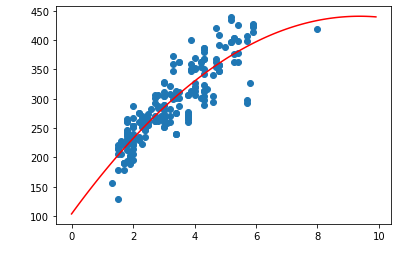

In [51]:
train_x=np.asanyarray(train[['ENGINE_SIZE']])
train_y=np.asanyarray(train[['CO2_EMISSIONS']])
test_x=np.asanyarray(test[['ENGINE_SIZE']])
test_y=np.asanyarray(test[['CO2_EMISSIONS']])

poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)

clf=linear_model.LinearRegression()
train_y_hat=clf.fit(train_x_poly,train_y)
print("The Coefficient are ",clf.coef_)
print("The intercept is ",clf.intercept_)

plt.scatter(train.ENGINE_SIZE,train.CO2_EMISSIONS)
XX=np.arange(0.0,10,0.1)
yy=clf.intercept_[0]+clf.coef_[0][1]*XX+clf.coef_[0][2]*np.power(XX,2)
plt.xlabel("ENGINE SIZE",color='white',size=20)
plt.ylabel("CO2 EMISSIONS",color='white',size=20)
plt.plot(XX,yy,'-r')
plt.show()

In [52]:
test_x_poly=poly.fit_transform(test_x)
test_y_hat=clf.predict(test_x_poly)
print("The Mean Absolute Error is : %.2f " % np.mean(np.absolute(test_y_hat-test_y)))
print("The Mean Sum of Square Error is : %.2f " % np.mean((test_y_hat-test_y)**2))
print("The R2 Score is : %.2f " % r2_score(test_y_hat,test_y))

The Mean Absolute Error is : 23.86 
The Mean Sum of Square Error is : 974.49 
The R2 Score is : 0.64 
